In [2]:
###loading large file 
import pandas as pd

In [3]:
import os

In [5]:
os.listdir('./online_retail_II')

['online_retail_II.csv']

In [7]:
#https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci, downloaded from kaggle
data=pd.read_csv('./online_retail_II/online_retail_II.csv')### due to computation and memory constraints this 92 MB file is assumed to be a big data file

In [8]:
##in reality if the data is huge we take a sample of the data and train models on that, since the data here is for 13 months only
##when we aggregate the complete data has been taken

In [9]:
##we can take a sample and get modeling insights using data science
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Checking for Null Values and Imputing Them.

In [10]:
data.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [12]:
data['Customer ID']=data['Customer ID'].fillna(0)
data['Description']=data['Description'].fillna('Desc missing')

In [79]:
###for unregistered guest customer the customer id is taken as 0

In [13]:
data['Customer ID']=data['Customer ID'].astype(int)

In [14]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [15]:
###we can use market basket analysis for data driven insights
data['transaction_month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['transaction_year'] = pd.DatetimeIndex(data['InvoiceDate']).year
grouping_cols=['Invoice','transaction_month','transaction_year']

In [16]:
data[data.duplicated(subset=grouping_cols, keep=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,transaction_month,transaction_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,12,2009
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,12,2011


In [17]:
agg_data_quant_sold_by_month_year=data.groupby(['transaction_month','transaction_year'])["Quantity"].sum()

In [18]:
agg_data_quant_sold_by_month_year=agg_data_quant_sold_by_month_year.reset_index().sort_values(['transaction_year','transaction_month'])

In [19]:
agg_data_quant_sold_by_month_year.columns

Index(['transaction_month', 'transaction_year', 'Quantity'], dtype='object')

In [20]:
agg_data_quant_sold_by_month_year['timestamp']=agg_data_quant_sold_by_month_year.apply(lambda x:str(x['transaction_year'])+'-'+str(x['transaction_month']),axis=1)

In [21]:
agg_data_quant_sold_by_month_year.drop(columns=['transaction_month','transaction_year'],axis=1,inplace=True)

In [22]:
agg_data_quant_sold_by_month_year.set_index('timestamp',inplace=True)

In [23]:
agg_data_quant_sold_by_month_year

,Quantity
timestamp,
2009-12,420088
2010-1,375363
2010-2,368402
2010-3,489370
2010-4,351971
2010-5,364095
2010-6,388253
2010-7,302201
2010-8,451803


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima
from pmdarima.arima import auto_arima
pd.set_option('display.float_format', lambda x: '%20f' % x)

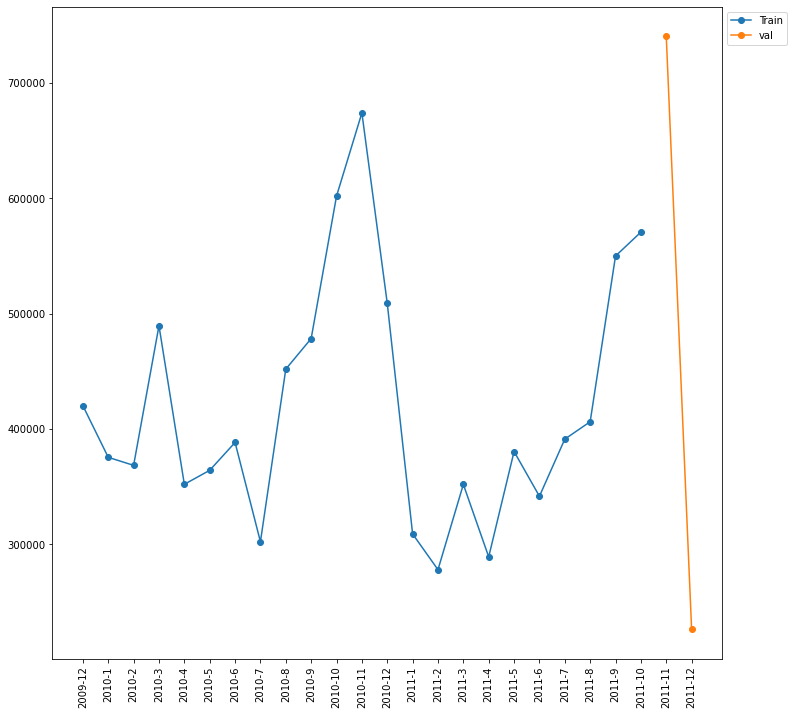

In [25]:
# Train Test Split Index
split_idx=int(len(agg_data_quant_sold_by_month_year)*0.95)

# Split
train = agg_data_quant_sold_by_month_year.iloc[:split_idx]
val = agg_data_quant_sold_by_month_year.iloc[split_idx:]
# Visualize split
fig,ax= plt.subplots(figsize=(12,12))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(val, label='val', **kws)
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=[1,1]);

In [26]:
val

,Quantity
timestamp,
2011-11,740286
2011-12,226334


# Applying the AUTO ARIMA MODEL

In [27]:
model = auto_arima(train, start_p=0, start_q=0,seasonal=False)
model.summary()
##seasonal components are (000), p value is 1 , d we need to check and q value is 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -293.731
Date:                Wed, 03 Aug 2022   AIC                            593.461
Time:                        21:08:19   BIC                            596.868
Sample:                             0   HQIC                           594.318
                                 - 23                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.69e+05   8.87e+04      1.906      0.057   -4808.596    3.43e+05
ar.L1          0.6039      0.189      3.187      0.001       0.233       0.975
sigma2      7.419e+09      0.069   1.08e+11      0.000    7.42e+09    7.42e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.45   Prob(JB):                         0.74
Heteroskedasticity (H):               1.03   Skew:                             0.09
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.06e+27. Standard errors may be unstable.
"""

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


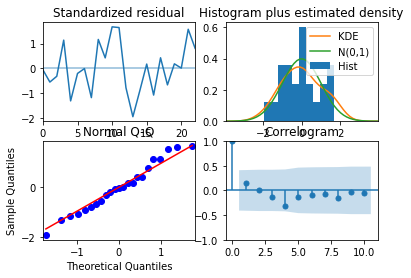

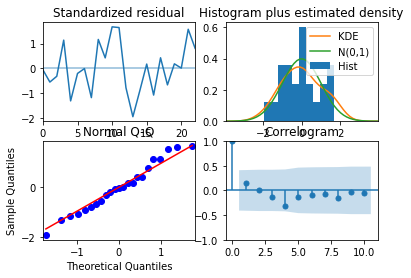

In [28]:
model.plot_diagnostics()

In [29]:
from pmdarima.utils import c, diff

x = c(train['Quantity'])
values=diff(x, differences=1)

In [30]:
values

array([ -44725.,   -6961.,  120968., -137399.,   12124.,   24158.,
        -86052.,  149602.,   26459.,  123467.,   72127., -164980.,
       -199910.,  -30977.,   73883.,  -62774.,   91293.,  -38768.,
         49493.,   15083.,  143618.,   20715.])

# Testing the Hypothesis

In [31]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(values):
    result=adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    return result

result=adfuller_test(values)
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")



ADF Test Statistic : -4.4665059857209854
p-value : 0.00022593613213257475
#Lags Used : 0
Number of Observations : 21
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [40]:
##d value is 1 difference
#p=1
#q=0
x = c(train['Quantity'])
differenced_train=diff(x, differences=1)

In [50]:
train

,Quantity
timestamp,
2009-12,420088
2010-1,375363
2010-2,368402
2010-3,489370
2010-4,351971
2010-5,364095
2010-6,388253
2010-7,302201
2010-8,451803


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


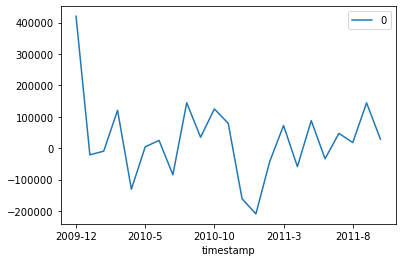

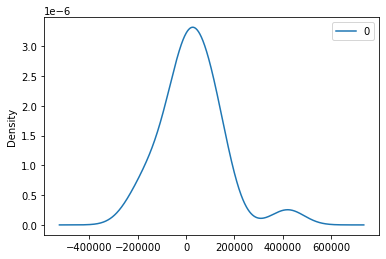

                         0
count            23.000000
mean          26152.215693
std          127544.965009
min         -209203.411155
25%          -37931.726692
50%           24840.951369
75%           83419.434487
max          420088.000000


In [44]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

model_1 = ARIMA(train, order=(1,1, 0))
model_fit = model_1.fit()
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# Forecasting the Results

In [45]:
forecast = model_fit.get_forecast(steps=2)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

In [35]:
yhat##predicted values

2011-11-01          569365.113031
2011-12-01          569430.844395
Freq: MS, Name: predicted_mean, dtype: float64

In [46]:
yhat_conf_int###predicted confidence intervals

,lower Quantity,upper Quantity
2011-11-01,379866.282625,758863.943438
2011-12-01,308877.734903,829983.953887


In [47]:
val###actual values

,Quantity
timestamp,
2011-11,740286
2011-12,226334


In [48]:
import sklearn
sklearn.metrics.mean_absolute_percentage_error(val['Quantity'],yhat)

0.8733861370315883

In [49]:
val['Quantity']

timestamp
2011-11    740286
2011-12    226334
Name: Quantity, dtype: int64

##LStM

In [51]:
train.head()

,Quantity
timestamp,
2009-12,420088
2010-1,375363
2010-2,368402
2010-3,489370
2010-4,351971


<AxesSubplot:xlabel='timestamp'>

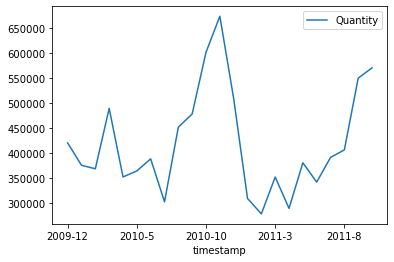

In [53]:
train.plot()

In [82]:
import numpy as np
def sampling(sequence, step_num):
    x_values=[]
    y_values=[]
    for index in range(len(sequence)):
        step = index + step_num
        if not (step > len(sequence)-1):
            x, y = sequence[index:step], sequence[step]
            x_values.append(x)
            y_values.append(y)
    return np.array(x_values), np.array(y_values)

In [97]:
train

,Quantity
timestamp,
2009-12,420088
2010-1,375363
2010-2,368402
2010-3,489370
2010-4,351971
2010-5,364095
2010-6,388253
2010-7,302201
2010-8,451803


In [100]:
val

,Quantity
timestamp,
2011-11,740286
2011-12,226334


In [110]:
step_num = 2

X_features, Y_features = sampling(train['Quantity'], step_num)

In [111]:
X_features.shape

(21, 2)

In [112]:
n_features = 1
X_features = X_features.reshape((X_features.shape[0], X_features.shape[1], n_features))

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(8, activation='relu', input_shape=(step_num, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mape')

In [118]:
history=model.fit(X_features, Y_features, epochs=200, verbose=0)

In [107]:
from numpy import array

In [129]:
x_input=train['Quantity'].values[-2:]
x_input = x_input.reshape((1, step_num, n_features))
yhat1 = model.predict(x_input, verbose=0)

In [150]:
yhat1.reshape(-1,)[0]

522386.6

In [137]:
x_input=array([train['Quantity'].values[-1:][0],val['Quantity'].values[0]])
x_input = x_input.reshape((1, step_num, n_features))
yhat2 = model.predict(x_input, verbose=0)

In [152]:
val['Quantity'].values
[yhat1.reshape(-1,)[0],yhat2.reshape(-1,)[0]]

[522386.6, 594041.0]

In [149]:
sklearn.metrics.mean_absolute_percentage_error(val['Quantity'].values,[yhat1.reshape(-1,)[0],yhat2.reshape(-1,)[0]])

0.9594830159530975

LSTM does a bad job here since it is a classic overfit case with less data for training

lets go with simpler model

holtwinters exponential smoothing

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


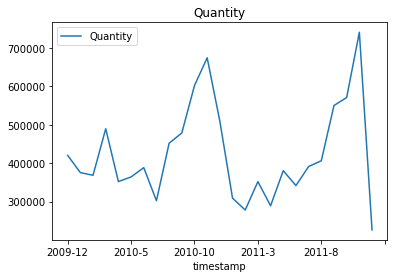

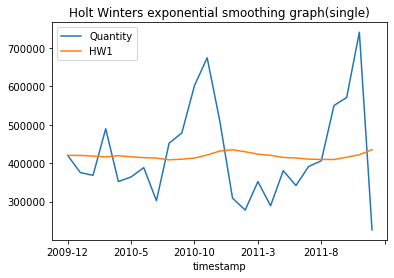

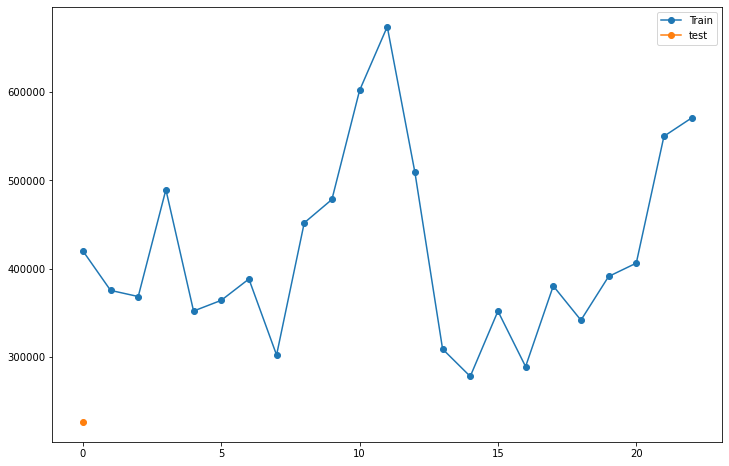

In [177]:
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ts=agg_data_quant_sold_by_month_year
ts[['Quantity']].plot(title='Quantity')
x=12###year
alpha=1/(2*x)
ts['HW1'] = SimpleExpSmoothing(ts['Quantity']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
ts[['Quantity','HW1']].plot(title='Holt Winters exponential smoothing graph(single)')
split_idx = int(np.ceil(len(agg_data_quant_sold_by_month_year)*0.90))


# Split
train = ts['Quantity'].values[:split_idx]
train
val=ts['Quantity'].values[split_idx+1:]
# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(val,label='test',**kws)
ax.legend(bbox_to_anchor=[1,1])
#ax.set_xticklabels(ts['Quantity'].index, rotation=70);

In [175]:
val

array([226334], dtype=int64)

In [171]:
mean_absolute_percentage_error(ts['Quantity'].values[split_idx+1:],ts['HW1'].values[split_idx+1:])

0.9219543840718701

In [179]:
###since the data above is very less for just 12 months all these models are overfit and giving bad results
##had we had more data the above models can be compared considered
# as of now the arima(0.87)>(holt winters exponential smoothing(0.92)>(LSTM 0.95))
#so far arima is doing a good job 